In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scp
import seaborn as sns

# KECK

In [3]:
keck = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')

olga_trb = pd.read_csv('/home/dluppov/TRB_10_7.tsv', sep = '\t', header = None)
olga_trb.rename(columns = {0: 'seq', 1: 'aa', 2: 'V_gene', 3: 'J_gene'}, inplace = True)
olga_trb


#use only most probabe predicted gene
keck.v = keck.v.apply(lambda x: x.split(',')[0] if ',' in x else x)

In [7]:
#genes which presence only in keck

def_list_keck = list(set(keck.v).difference(olga_trb.V_gene))
def_list_keck

['TRBV21-1',
 'TRBV5-2',
 'TRBV7-1',
 'TRBV7-5',
 'TRBV22-1',
 'TRBV12-1',
 'TRBV1',
 'TRBV5-3',
 'TRBV8-2',
 'TRBV3-2',
 'TRBV23-1',
 'TRBV6-7',
 'TRBV5-7',
 'TRBV26',
 'TRBV17',
 'TRBV12-2']

In [6]:
#genes which presence only in OLGA


olga_di_list = list(set(olga_trb.V_gene).difference(keck.v))
olga_di_list

['TRBV12-3', 'TRBV6-2']

In [8]:
olga_freq = olga_trb.V_gene.value_counts().drop(olga_di_list)
olga_freq = olga_freq/olga_freq.sum()

In [9]:
keck_freq = keck.v.value_counts().drop(def_list_keck)
keck_freq = (keck_freq/keck_freq.sum()).loc[olga_freq.index]

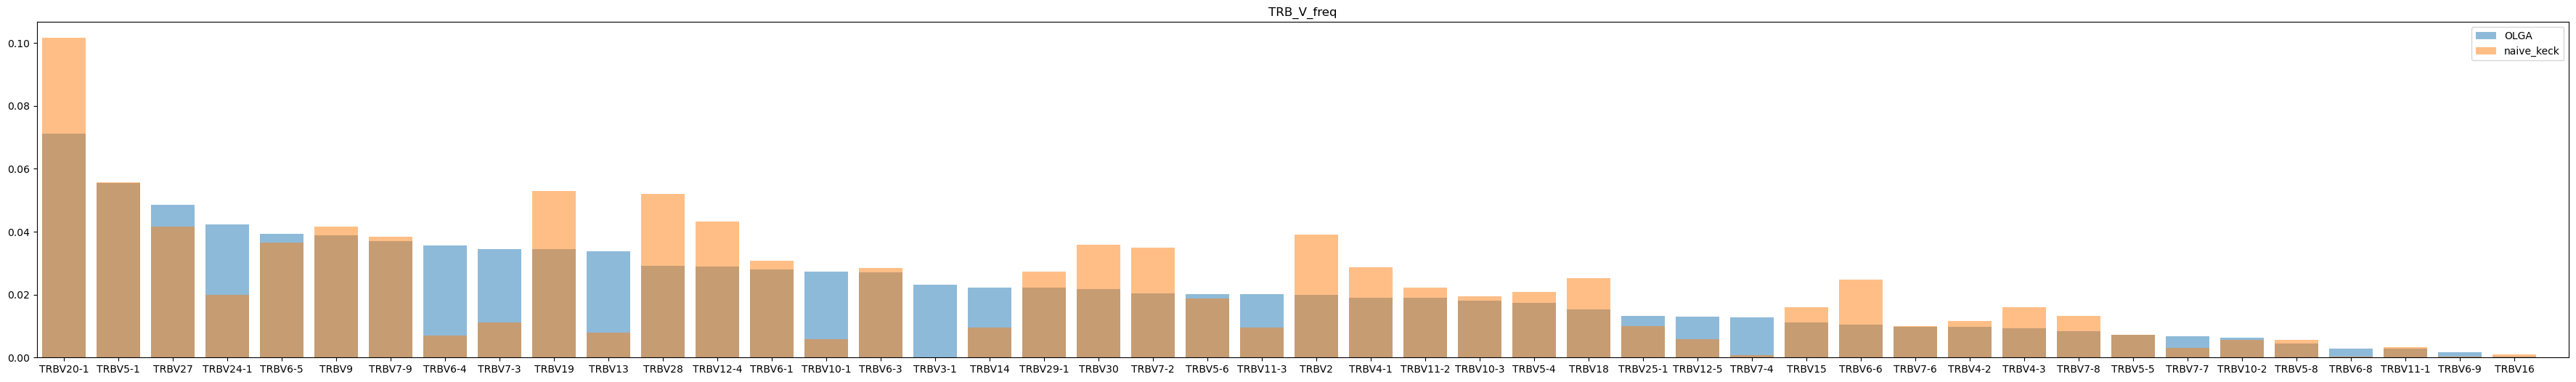

In [54]:
#plot the gene usage freqs 

plt.figure(figsize=(45, 6))
plt.title("TRB_V_freq")
plt.xlim(-0.5, len(olga_freq))
olga_trb_freq_2 = (olga_trb_freq_2/olga_trb_freq_2.sum()).sort_values(ascending=False)
keck_freq = keck_freq[olga_trb_freq_2.index]
plt.bar(olga_trb_freq_2.index, olga_trb_freq_2, alpha = 0.5, align='center', label = 'OLGA')
plt.bar(keck_freq.index, keck_freq, alpha = 0.5, align='center', label = 'naive_keck')
plt.legend()
plt.show()

In [ ]:
# as we can see - the freq difference is rather large - it makes determined genes data unreliable

In [20]:
keck.j = keck.j.apply(lambda x: x.split(',')[0] if ',' in x else x)

In [21]:
keck_freq_j = keck.j.value_counts()/keck.j.value_counts().sum()
olga_freq_j = olga_trb.J_gene.value_counts()/olga_trb.J_gene.value_counts().sum()
keck_freq_j = keck_freq_j.loc[olga_freq_j.index]

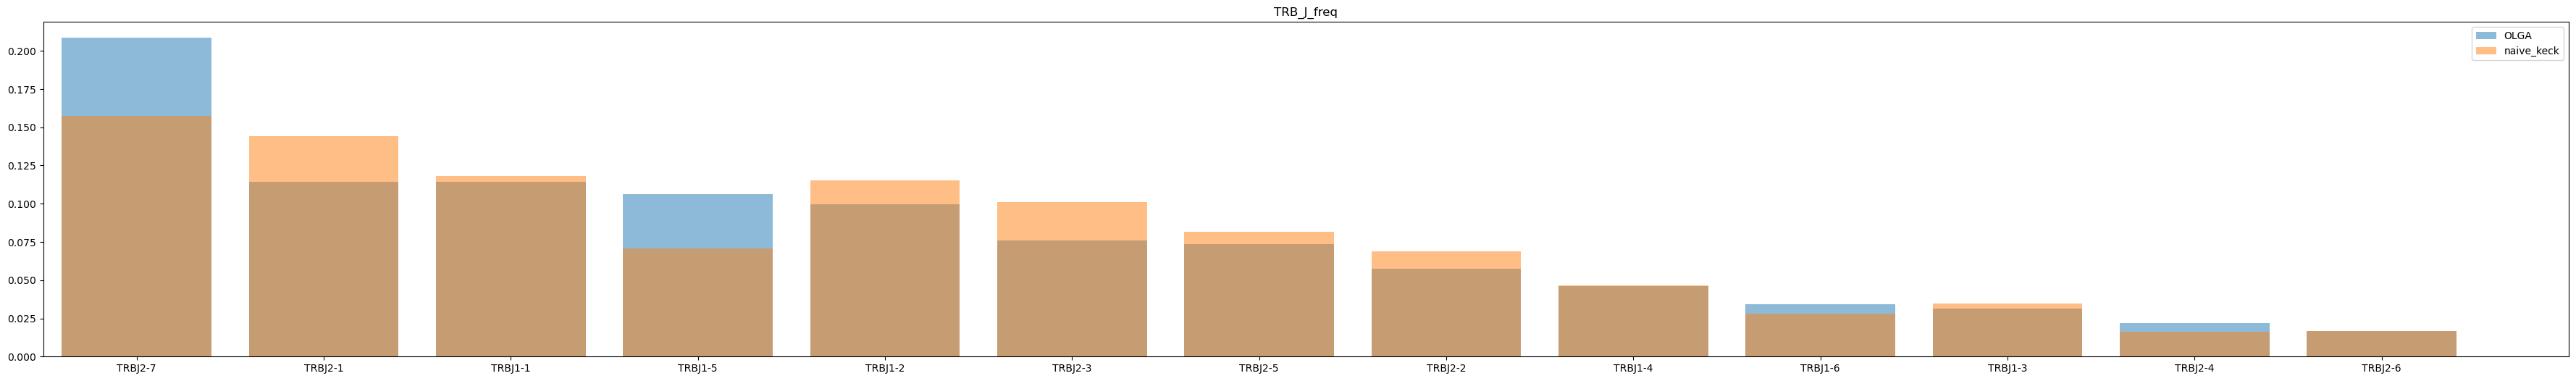

In [22]:
plt.figure(figsize=(45, 6))
plt.title("TRB_J_freq")
plt.xlim(-0.5, len(olga_freq_j))
plt.bar(olga_freq_j.index, olga_freq_j, alpha = 0.5, align='center', label = 'OLGA')
plt.bar(keck_freq_j.index, keck_freq_j, alpha = 0.5, align='center', label = 'naive_keck')
plt.legend()
plt.show()

In [10]:
# J gene determination is more reliable

# Genes clusters

In [11]:
keck_raw = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')
keck_raw.v = keck_raw.v.apply(lambda x: ','.join(x.split(',')[0:2]) if ',' in x else x)

In [22]:
keck_raw_freq = keck_raw.v.value_counts()

In [23]:
freq_dif = abs(olga_freq - keck_freq)

In [16]:
#calculate gene usage diference in OLGA and KECK in biased seqs

res_dict = {}
for gene in freq_dif.index:
    res_dict[gene] = {}
    for gene1 in freq_dif.index:
        if gene1 == gene:
            res_dict[gene][gene] = 2*freq_dif[gene]
        else:
            if f'{gene},{gene1}' in keck_raw_freq.index:
                res_dict[gene][gene1] = freq_dif[gene] + freq_dif[gene1]

In [20]:
res = pd.DataFrame(res_dict)
res = res.loc[res.columns]

<AxesSubplot:>

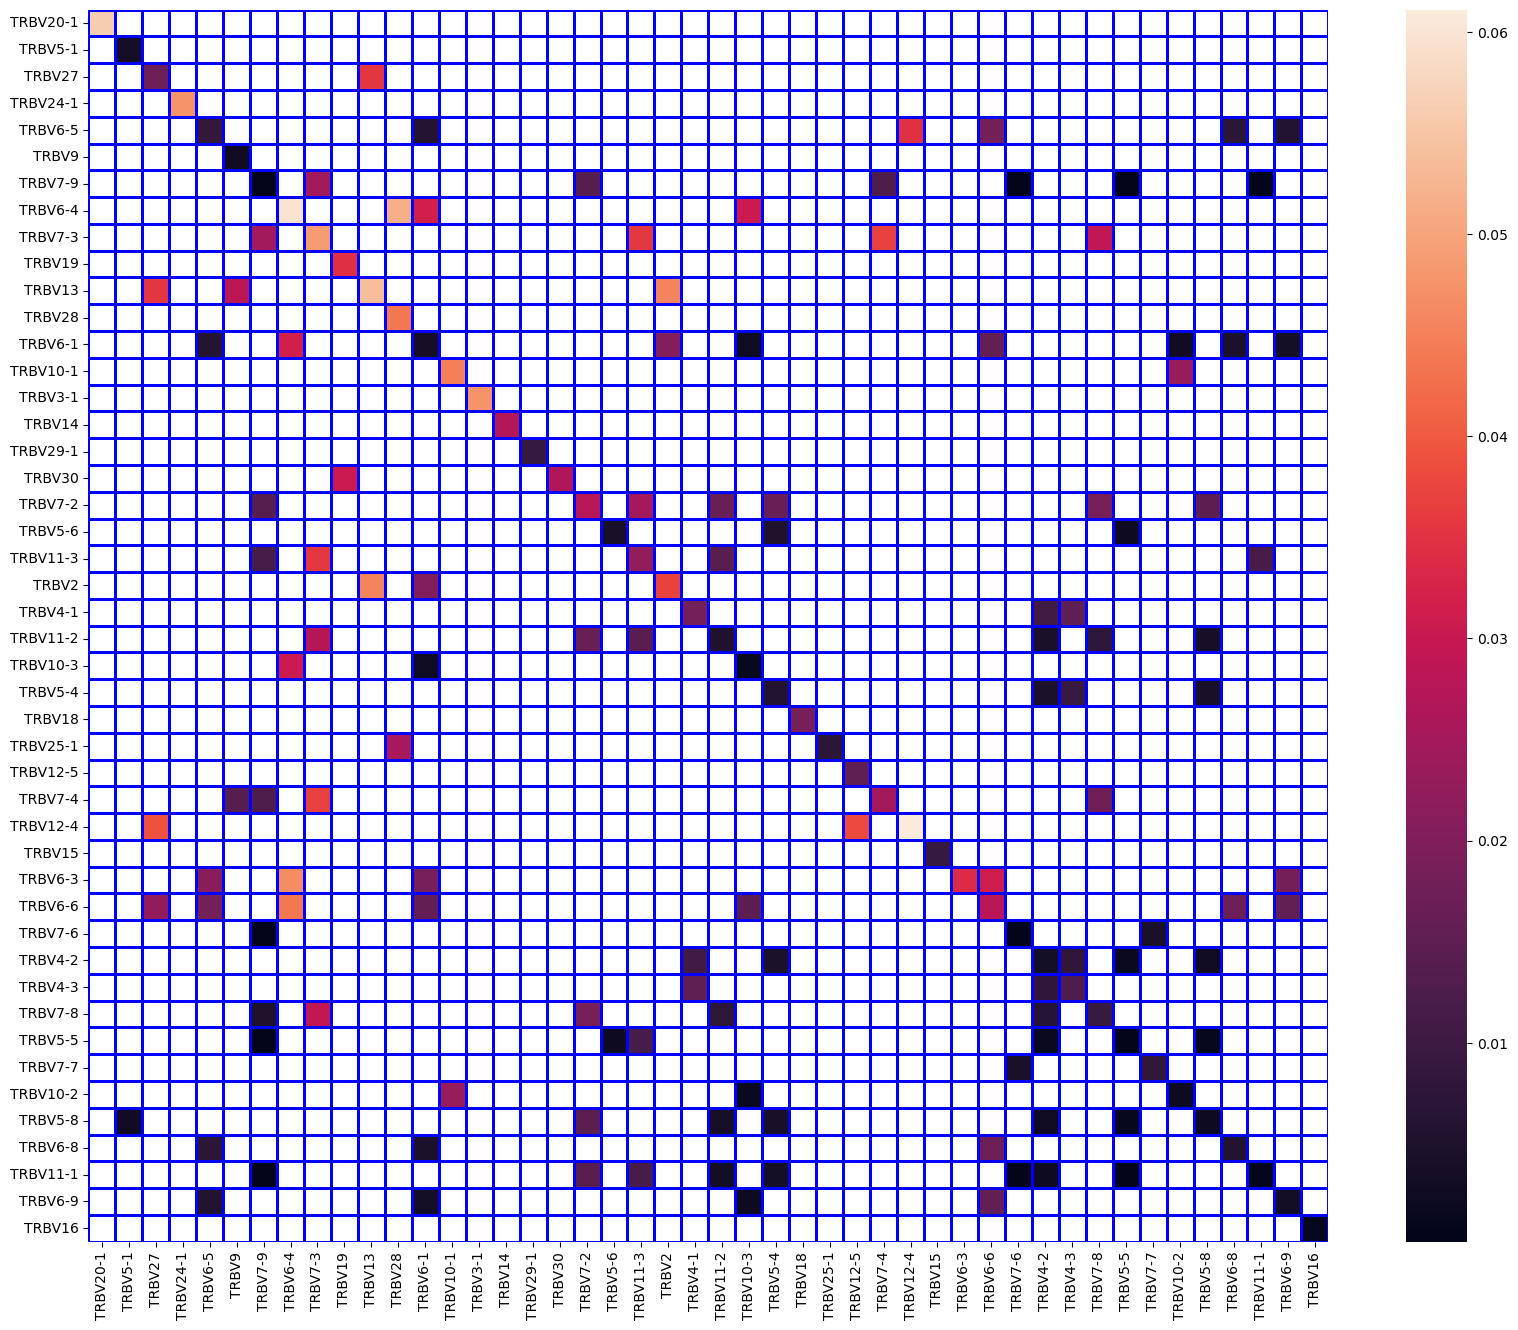

In [21]:
plt.figure(figsize=(20, 16))
sns.heatmap(res, linecolor = 'b', linewidths=1)

In [63]:
# as we can see most bias comes from clusters of genes. For software it is hard to destinguisg genes within clusters.
# Thus - combine them in one

# Joint

In [65]:
olga_trb = pd.read_csv('/home/dluppov/TRB_10_7.tsv', sep = '\t', header = None)
olga_trb.rename(columns = {0: 'seq', 1: 'aa', 2: 'V_gene', 3: 'J_gene'}, inplace = True)
olga_trb_freq = olga_trb.V_gene.value_counts()
#use only gene clusters
olga_trb_freq.index = pd.Series(olga_trb_freq.index).apply(lambda x: x.split('-')[0])
olga_trb_freq = olga_trb_freq.groupby(level = 0).sum()

olga_trb_freq = olga_trb_freq.sort_values(ascending=False)
olga_trb_freq

TRBV6     1451585
TRBV7     1297763
TRBV5     1044209
TRBV20     710824
TRBV10     516925
TRBV27     485213
TRBV24     422639
TRBV12     419593
TRBV11     418541
TRBV9      389045
TRBV4      379600
TRBV19     344630
TRBV13     338216
TRBV28     290805
TRBV3      230358
TRBV14     221414
TRBV29     221113
TRBV30     218457
TRBV2      199045
TRBV18     153267
TRBV25     131160
TRBV15     112007
TRBV16       3591
Name: V_gene, dtype: int64

In [66]:
keck_raw = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'),
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'), keck_raw.cdr3aa.str.endswith('F')))]
               
keck_raw_freq = keck_raw.v.value_counts()
keck_raw_freq = keck_raw.v.value_counts()
keck_raw_freq.index = pd.Series(keck_raw_freq.index).apply(lambda x: x.split(',')[0])

keck_raw_freq = keck_raw_freq.groupby(level = 0).sum()
keck_raw_freq.index = pd.Series(keck_raw_freq.index).apply(lambda x: x.split('-')[0])
keck_raw_freq.groupby(level = 0).sum()


keck_raw_freq = keck_raw_freq.groupby(level = 0).sum()
keck_raw_freq = keck_raw_freq[olga_trb_freq.index]
keck_raw_freq

TRBV6     118116
TRBV7     102485
TRBV5     101034
TRBV20     93946
TRBV10     28299
TRBV27     38422
TRBV24     18398
TRBV12     46489
TRBV11     32260
TRBV9      38427
TRBV4      52028
TRBV19     48921
TRBV13      7406
TRBV28     48134
TRBV3      31136
TRBV14      8722
TRBV29     25283
TRBV30     33064
TRBV2      36173
TRBV18     23168
TRBV25      9247
TRBV15     14827
TRBV16       900
Name: v, dtype: int64

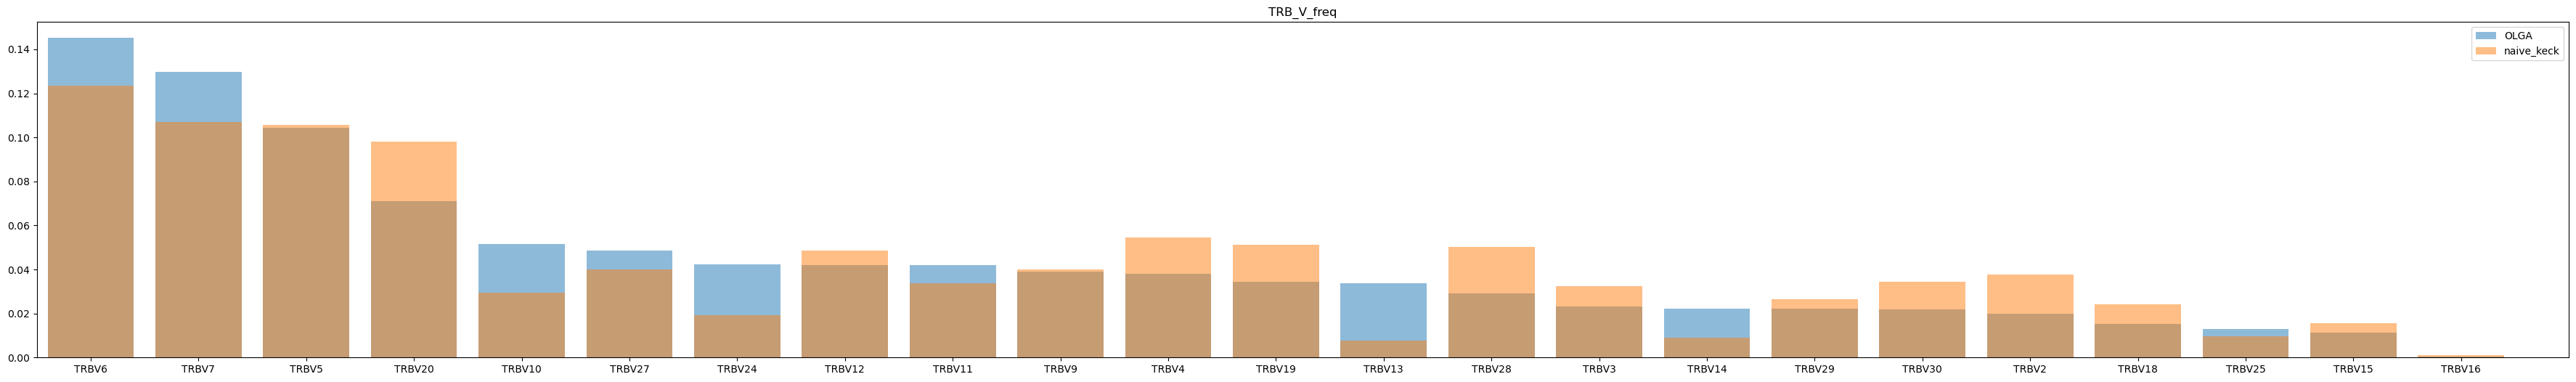

In [67]:
plt.figure(figsize=(45, 6))
plt.title("TRB_V_freq")
plt.xlim(-0.5, len(olga_trb_freq))
olga_trb_freq = olga_trb_freq/olga_trb_freq.sum()
plt.bar(olga_trb_freq.index, olga_trb_freq, alpha = 0.5, align='center', label = 'OLGA')
keck_raw_freq = keck_raw_freq/keck_raw_freq.sum()
plt.bar(keck_raw_freq.index, keck_raw_freq, alpha = 0.5, align='center', label = 'naive_keck')
plt.legend()
plt.show()

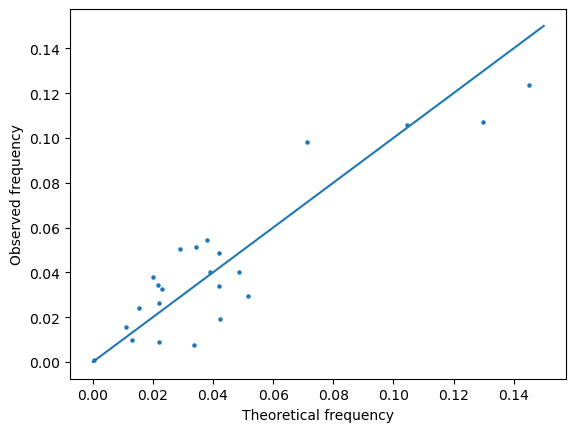

In [68]:
plt.scatter(olga_trb_freq, keck_raw_freq, s = 5)
plt.xlabel('Theoretical frequency')
plt.ylabel('Observed frequency')
plt.plot([0, 0.15], [0, 0.15])